# Visualizing Time Series Data in Python - Part 5

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Datasets

### Employments

In [3]:
jobs_dataset = pd.read_csv('../datasets/time series/employment.csv')

## Case Study: Unemployment Rate
This chapter will give you a chance to practice all the concepts covered in the course. You will visualize the unemployment rate in the US from 2000 to 2010.

### Explore the Jobs dataset
In this exercise, you will explore the new `jobs` DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.

In [4]:
jobs = jobs_dataset.copy()

In [5]:
# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

### Describe time series data with boxplots
You should always explore the distribution of the variables, and because you are working with time series, you will explore their properties using boxplots and numerical summaries. As a reminder, you can plot data in a DataFrame as boxplots with the command:

```df.boxplot(fontsize=6, vert=False)```

Notice the introduction of the new parameter `vert`, which specifies whether to plot the boxplots horizontally or vertically.

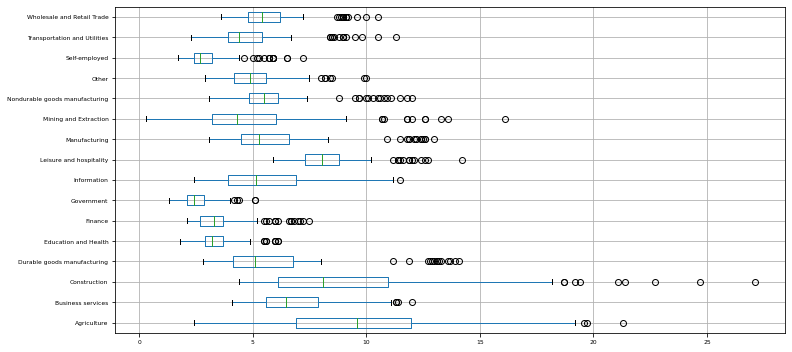

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [7]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False, figsize=(12,6))
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

### Plot all the time series in your dataset
The `jobs` DataFrame contains 16 time series representing the unemployment rate of various industries between 2001 and 2010. This may seem like a large amount of time series to visualize at the same time, but Chapter 4 introduced you to facetted plots. In this exercise, you will explore some of the time series in the `jobs` DataFrame and look to extract some meaningful information from these plots.

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


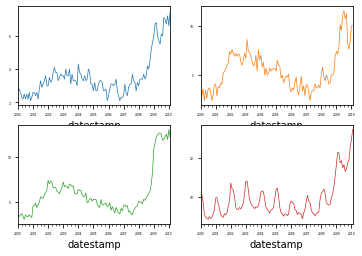

In [8]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

### Annotate significant events in time series data
When plotting the `Finance`, `Information`, `Manufacturing` and `Construction` time series of the `jobs` DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.

Recall that you have already set the `datestamp` column as the index of the `jobs` DataFrame, so you are prepared to directly annotate your plots with vertical or horizontal lines.

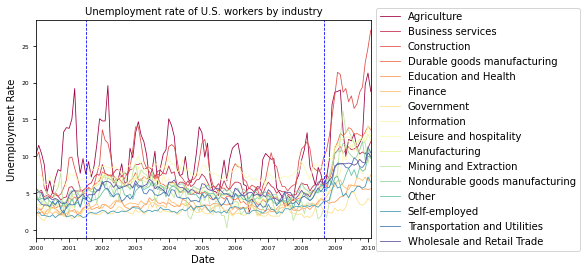

In [9]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

### Plot monthly and yearly trends
Like we saw in Chapter 2, when the index of a DataFrame is of the `datetime` type, it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the `.index.year` attribute. You can then use the `.groupby()` and `.mean()` methods to compute the mean annual value of each time series in your DataFrame:

```
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
```

You will now apply what you have learned to display the aggregate mean values of each time series in the `jobs` DataFrame.

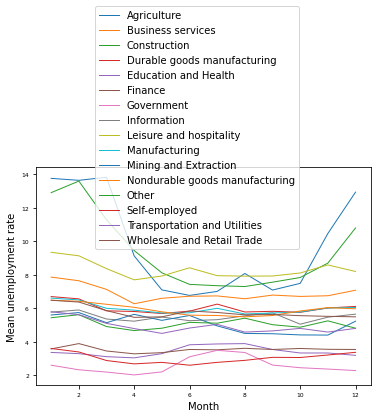

In [10]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

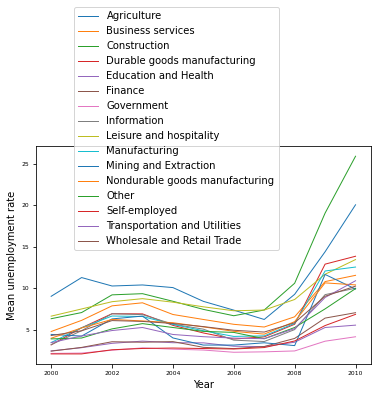

In [11]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

### Apply time series decomposition to your dataset
You will now perform time series decomposition on multiple time series. You can achieve this by leveraging the Python dictionary to store the results of each time series decomposition.

In this exercise, you will initialize an empty dictionary with a set of curly braces, `{}`, use a `for` loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, you place the results in the dictionary by using the command `my_dict[key] = value`, where `my_dict` is your dictionary, `key` is the name of the column/time series, and `value` is the decomposition object of that time series.

In [12]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

### Visualize the seasonality of multiple time series
You will now extract the `seasonality` component of `jobs_decomp` to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of `seasonality` components into a DataFrame using the `pd.DataFrame.from_dict()` function.

An empty dictionary `jobs_seasonal` and the time series decomposition object `jobs_decomp` from the previous exercise are available in your workspace.

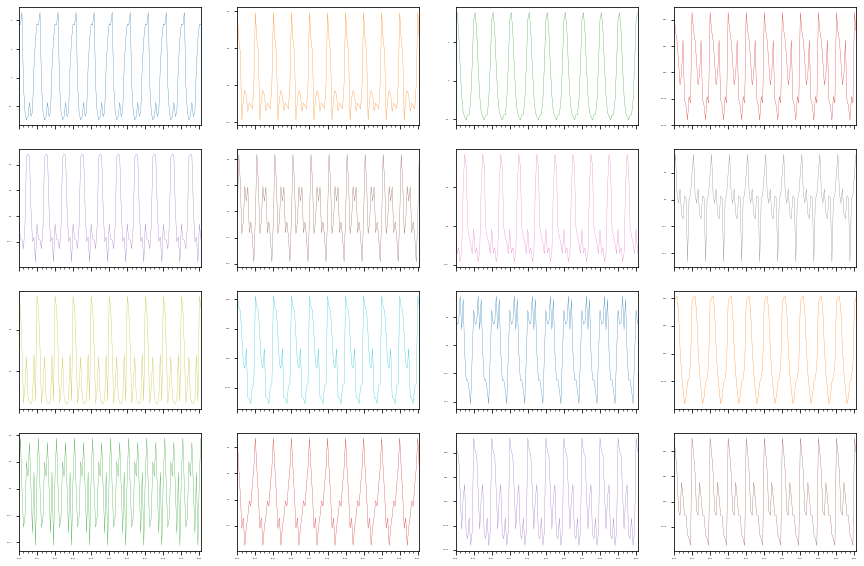

In [20]:
jobs_seasonal = {}

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal

# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                    layout=(4, 4),
                    sharey=False,
                    fontsize=2,
                    linewidth=0.3,
                    legend=False,
                    figsize=(15,10))

# Show plot
plt.show()

### Correlations between multiple time series
In the previous exercise, you extracted the `seasonal` component of each time series in the `jobs` DataFrame and stored those results in new DataFrame called `seasonality_df`. In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help uncover which job industries are the most similar or the most different.

This can be achieved by using the `seasonality_df` DataFrame and computing the correlation between each time series in the dataset. In this exercise, you will leverage what you have learned in Chapter 4 to compute and create a clustermap visualization of the correlations between time series in the `seasonality_df` DataFrame.

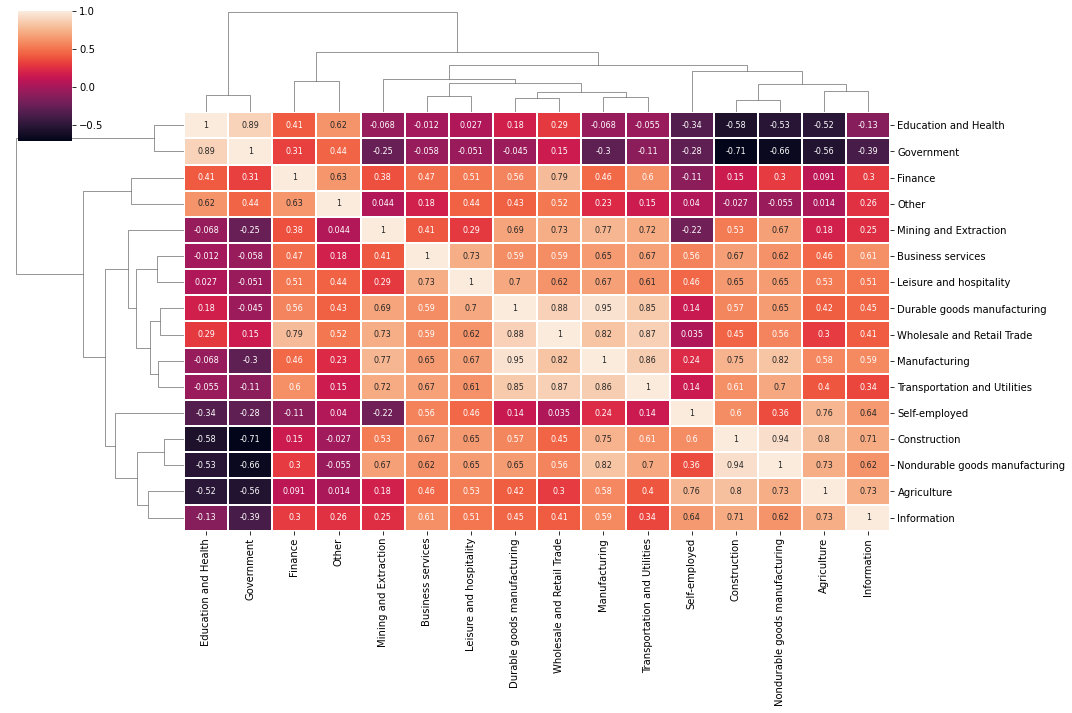

0.89


In [18]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr('spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 8}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)

### Interpret correlations
The time series in the jobs DataFrame contain multiple time series with very different seasonalities. Using the clustermap of the correlation plots that you generated in the previous exercise, can you identify and discuss which time series is the most correlated to the Self-Employed job?

### Answear
Agriculture